<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/Final/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Read the data from the text file
with open('/content/aa1122.csv', 'r') as f:
    lines = f.readlines()

# Initialize variables
num_of_rows = len(lines)
var = np.zeros((num_of_rows - 1, 24))  # save two variables from the file

# load the data
for num in range(1, num_of_rows):  # we don't need the first row
    xx = lines[num].strip()  # variable to save each line of lines
    l = []
    for t in xx.split(','):
        try:
            l.append(float(t))
        except ValueError:
            pass
    var[num - 1, :] = l[1:25]
temperature_avg = np.mean(var[:, ::2], axis=1)
precipitation_avg = np.mean(var[:, 1::2], axis=1)
var = pd.DataFrame({'Temperature Average': temperature_avg, 'Precipitation Average': precipitation_avg})
type(var)

pandas.core.frame.DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


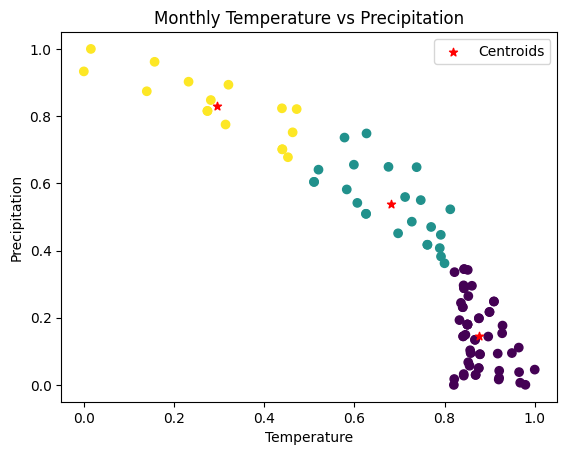

In [7]:

# Scaling the variables have large diff.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(var)

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
centroids = kmeans.cluster_centers_

# Plot the scatter plot with centroid points
fig, ax = plt.subplots(1, 1)
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*', label='Centroids')
ax.set_title("Monthly Temperature vs Precipitation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Precipitation")
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

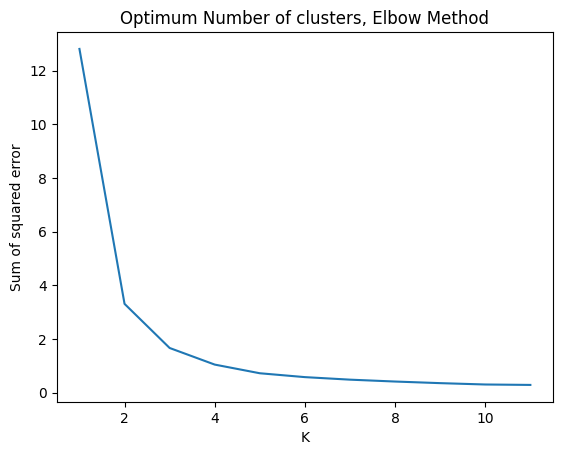

In [8]:
k_rng = range (1, 12)
sse =[]
for k in k_rng:
  km=KMeans(init="random", n_clusters=k, random_state=0)
  km.fit(scaled_data)
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title("Optimum Number of clusters, Elbow Method")
plt.plot(k_rng,sse)

In [9]:
from sklearn.metrics import silhouette_score

# After fitting the K-means model
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_data, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5905885279010255


In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Perform K-means clustering with varying hyperparameters
num_clusters = [3, 4, 5]  # Vary the number of clusters
init_methods = ['random', 'k-means++']  # Vary the initialization method

best_model = None
best_score = -1

for n in num_clusters:
    for init in init_methods:
        kmeans = KMeans(n_clusters=n, init=init, random_state=0)
        kmeans.fit(scaled_data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_data, labels)
        print("Number of clusters:", n)
        print("Initialization method:", init)
        print("Silhouette Score:", silhouette_avg)
        print()

        # Check if this model has a higher silhouette score than the previous best
        if silhouette_avg > best_score:
            best_model = kmeans
            best_score = silhouette_avg

print("Best Model:")
print(best_model)
print("Best Silhouette Score:", best_score)


Number of clusters: 3
Initialization method: random
Silhouette Score: 0.5905885279010255

Number of clusters: 3
Initialization method: k-means++
Silhouette Score: 0.5905885279010255

Number of clusters: 4
Initialization method: random
Silhouette Score: 0.5165263494063664

Number of clusters: 4
Initialization method: k-means++
Silhouette Score: 0.52998419539346

Number of clusters: 5
Initialization method: random
Silhouette Score: 0.4733602618010238

Number of clusters: 5
Initialization method: k-means++
Silhouette Score: 0.4775108768621738

Best Model:
KMeans(init='random', n_clusters=3, random_state=0)
Best Silhouette Score: 0.5905885279010255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8